# Normalisasi Data Training dan Data Testing dengan Berbagai Metode

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import numpy as np

# Membaca dataset
data_training = pd.read_csv('../../data_training.csv')
data_testing = pd.read_csv('../../data_testing.csv')

# Menyimpan data asli untuk tampilan
original_train = data_training.copy()
original_test = data_testing.copy()

# Menghapus kolom 'Outcome' sebelum normalisasi
X_train = data_training.drop(columns=['Outcome'])
X_test = data_testing.drop(columns=['Outcome'])

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# 2. Z-Score (Standard Scaling)
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# 3. Decimal Scaling
def decimal_scaling(data):
    max_abs = np.max(np.abs(data), axis=0)
    scaling_factor = np.power(10, np.ceil(np.log10(max_abs)))
    return data / scaling_factor

X_train_decimal = decimal_scaling(X_train)
X_test_decimal = decimal_scaling(X_test)

# 4. Robust Scaler
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

# 5. L2 Normalization
l2_normalizer = Normalizer(norm='l2')
X_train_l2 = l2_normalizer.fit_transform(X_train)
X_test_l2 = l2_normalizer.transform(X_test)

# 6. Log Transformation
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

# Menyimpan hasil dalam DataFrame
normalized_data_train = {
    'MinMax': X_train_minmax,
    'Z-Score': X_train_standard,
    'Decimal': X_train_decimal,
    'Robust': X_train_robust,
    'L2': X_train_l2,
    'Log': X_train_log
}

normalized_data_test = {
    'MinMax': X_test_minmax,
    'Z-Score': X_test_standard,
    'Decimal': X_test_decimal,
    'Robust': X_test_robust,
    'L2': X_test_l2,
    'Log': X_test_log
}

# Membuat DataFrame untuk setiap metode
df_train_normalized = {method: pd.DataFrame(data, columns=X_train.columns) for method, data in normalized_data_train.items()}
df_test_normalized = {method: pd.DataFrame(data, columns=X_test.columns) for method, data in normalized_data_test.items()}


# Hasil Normalisasi Data Training

In [2]:
# Menampilkan data asli dan hasil normalisasi
def display_data(original, normalized, method):
    print(f"\nNormalisasi dengan {method}:\n")
    print("Data Asli:")
    print(original.head())
    print("\nData Normalisasi:")
    print(normalized.head())
    print("\n" + "="*150 + "\n")  # Pemisah

# Menampilkan hasil untuk setiap metode pada data training
for method, normalized_df in df_train_normalized.items():
    display_data(original_train, normalized_df, method)



Normalisasi dengan MinMax:

Data Asli:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2       84              0              0        0   0.0   
1            9      112             82             24        0  28.2   
2            1      139             46             19       83  28.7   
3            0      161             50              0        0  21.9   
4            6      134             80             37      370  46.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.304   21        0  
1                     1.282   50        1  
2                     0.654   22        0  
3                     0.254   65        0  
4                     0.238   46        1  

Data Normalisasi:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
1     0.529412  0.562814       0.672131       0.380952  0.000000  0.420268   
2     0.05

# Hasil Normalisasi Data Testing

In [3]:
# Menampilkan data asli dan hasil normalisasi untuk data testing
def display_data_test(original, normalized, method):
    print(f"\nNormalisasi dengan {method}:\n")
    print("Data Asli:")
    print(original.head())
    print("\nData Normalisasi:")
    print(normalized.head())
    print("\n" + "="*150 + "\n")  # Pemisah

# Menampilkan hasil untuk setiap metode pada data testing
for method, normalized_df in df_test_normalized.items():
    display_data_test(original_test, normalized_df, method)



Normalisasi dengan MinMax:

Data Asli:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6       98             58             33      190  34.0   
1            2      112             75             32        0  35.7   
2            2      108             64              0        0  30.8   
3            8      107             80              0        0  24.6   
4            7      136             90              0        0  29.9   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.430   43        0  
1                     0.148   21        0  
2                     0.158   21        0  
3                     0.856   34        0  
4                     0.210   50        0  

Data Normalisasi:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.492462       0.475410       0.523810  0.224586  0.506706   
1     0.117647  0.562814       0.614754       0.507937  0.000000  0.532042   
2     0.11

# Melatih Model KNN untuk Setiap Metode Normalisasi

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency

# Menyimpan label (kolom 'Outcome') untuk data training dan testing
y_train = original_train['Outcome']
y_test = original_test['Outcome']

# Daftar untuk menyimpan hasil evaluasi
results = {}

# Daftar metode normalisasi
methods = ['MinMax', 'Z-Score', 'Decimal', 'Robust', 'L2', 'Log']

# Melatih model KNN untuk setiap metode normalisasi
for method in methods:
    # Memilih dataset yang dinormalisasi
    X_train_final = df_train_normalized[method]
    X_test_final = df_test_normalized[method]

    # Melatih model KNN
    knn_model = KNeighborsClassifier(n_neighbors=17)
    knn_model.fit(X_train_final, y_train)

    # Memprediksi hasil untuk data testing
    y_pred = knn_model.predict(X_test_final)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Menghitung Specificity
    TN = conf_matrix[0, 0]  # True Negatives
    FP = conf_matrix[0, 1]  # False Positives
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Menghitung P-Value dari matriks kebingungan
    chi2, p_value, _, _ = chi2_contingency(conf_matrix)

    # Menyimpan hasil evaluasi
    results[method] = {
        'Akurasi': accuracy,
        'Matriks Kebingungan': conf_matrix,
        'Laporan Klasifikasi': class_report,
        'Specificity': specificity,
        'P-Value': p_value
    }

# Menampilkan hasil evaluasi untuk setiap metode
for method, metrics in results.items():
    print(f"=== Hasil Evaluasi Model KNN dengan {method} ===")
    print(f"Akurasi: {metrics['Akurasi']:.2f}")
    print(f"Specificity: {metrics['Specificity']:.2f}")
    print(f"P-Value: {metrics['P-Value']:.4f}")
    print("\nMatriks Kebingungan:\n", metrics['Matriks Kebingungan'])
    print("\nLaporan Klasifikasi:\n", metrics['Laporan Klasifikasi'])
    print("\n" + "="*150 + "\n")  # Pemisah


=== Hasil Evaluasi Model KNN dengan MinMax ===
Akurasi: 0.74
Specificity: 0.85
P-Value: 0.0000

Matriks Kebingungan:
 [[84 15]
 [25 30]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        99
           1       0.67      0.55      0.60        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



=== Hasil Evaluasi Model KNN dengan Z-Score ===
Akurasi: 0.75
Specificity: 0.86
P-Value: 0.0000

Matriks Kebingungan:
 [[85 14]
 [24 31]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



=== Hasil Evaluasi Mo

# Visualisasi P-Value

Data P-Value:
MinMax: 0.0000
Z-Score: 0.0000
Decimal: 0.0000
Robust: 0.0000
L2: 0.0192
Log: 0.0002


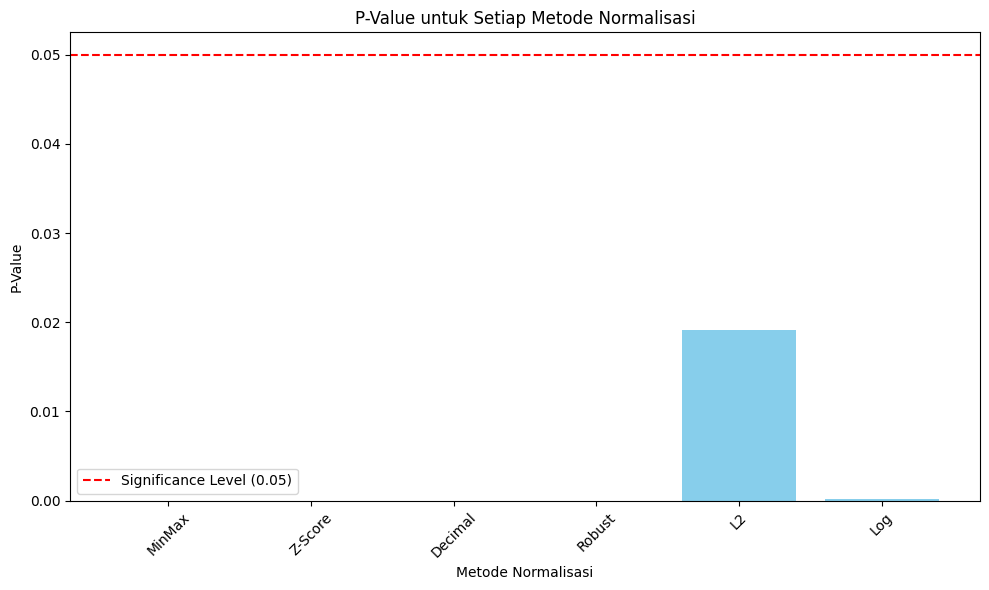

In [5]:
import matplotlib.pyplot as plt

# Mengambil P-Value dari hasil evaluasi
p_values = [metrics['P-Value'] for metrics in results.values()]
methods = list(results.keys())

# Menampilkan data P-Value
print("Data P-Value:")
for method, p_value in zip(methods, p_values):
    print(f"{method}: {p_value:.4f}")

# Membuat plot P-Value
plt.figure(figsize=(10, 6))
plt.bar(methods, p_values, color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('P-Value untuk Setiap Metode Normalisasi')
plt.xlabel('Metode Normalisasi')
plt.ylabel('P-Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualisasi Specificity

Data Specificity:
MinMax: 0.8485
Z-Score: 0.8586
Decimal: 0.8384
Robust: 0.8182
L2: 0.8485
Log: 0.7980


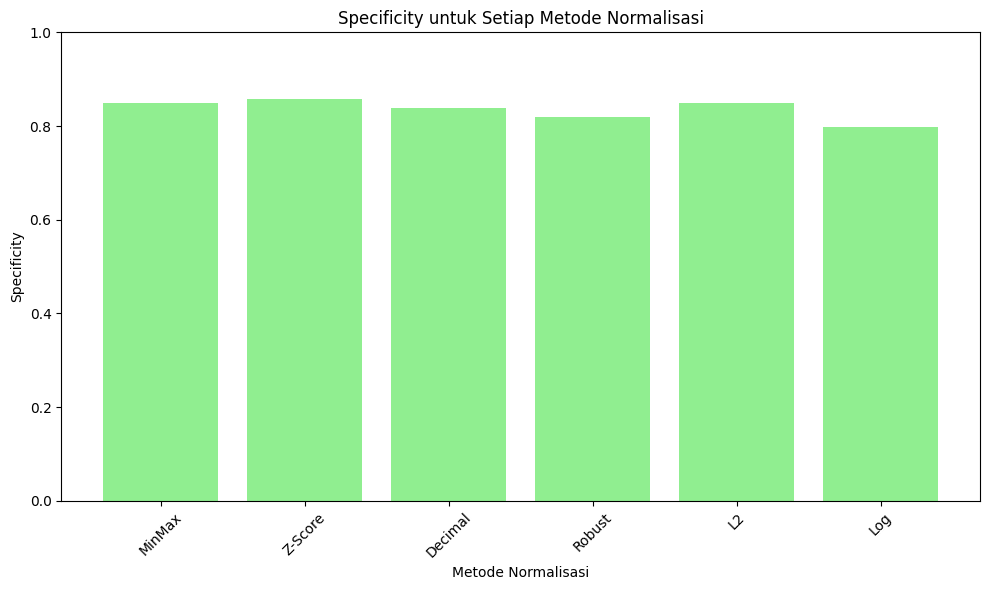

In [6]:
# Mengambil Specificity dari hasil evaluasi
specificities = [metrics['Specificity'] for metrics in results.values()]

# Menampilkan data Specificity
print("Data Specificity:")
for method, specificity in zip(methods, specificities):
    print(f"{method}: {specificity:.4f}")

# Membuat plot Specificity
plt.figure(figsize=(10, 6))
plt.bar(methods, specificities, color='lightgreen')
plt.title('Specificity untuk Setiap Metode Normalisasi')
plt.xlabel('Metode Normalisasi')
plt.ylabel('Specificity')
plt.ylim(0, 1)  # Mengatur batas y dari 0 hingga 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualisasi Evaluasi Model untuk Semua Metode Normalisasi

Data Akurasi:
MinMax: 0.74
Z-Score: 0.75
Decimal: 0.74
Robust: 0.72
L2: 0.66
Log: 0.69


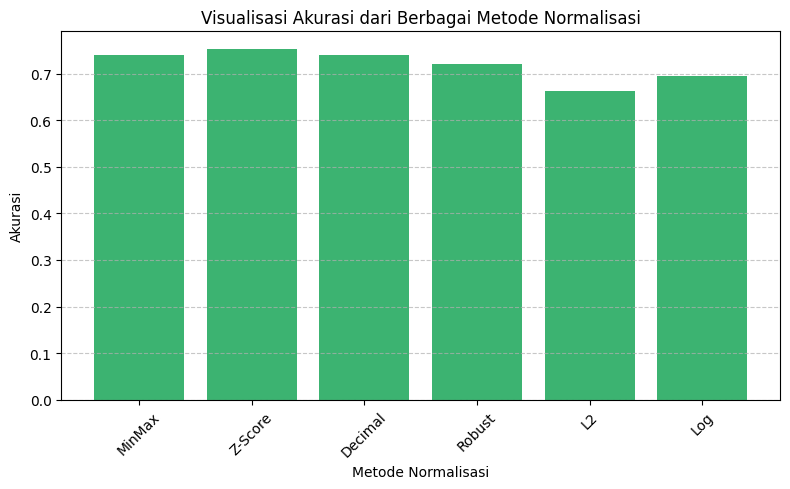

         Precision  Recall  F1-Score
MinMax        0.73    0.74      0.73
Z-Score       0.75    0.75      0.75
Decimal       0.73    0.74      0.74
Robust        0.71    0.72      0.72
L2            0.64    0.66      0.64
Log           0.69    0.69      0.69


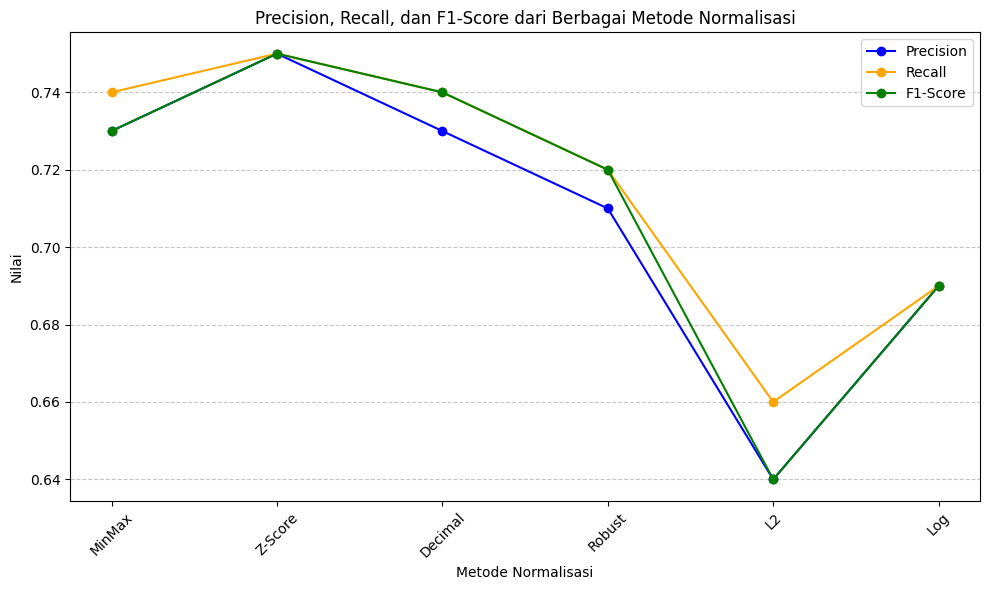

         Support
MinMax       154
Z-Score      154
Decimal      154
Robust       154
L2           154
Log          154


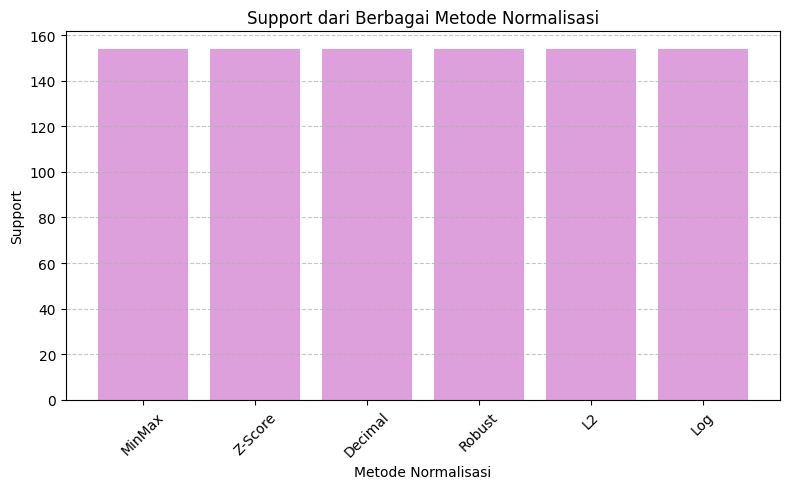

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengambil nilai Akurasi dari hasil evaluasi
accuracy_values = {method: metrics['Akurasi'] for method, metrics in results.items()}

# List data Akurasi dengan dua digit di belakang koma
accuracy_list = [(method, f"{acc:.2f}") for method, acc in accuracy_values.items()]
print("Data Akurasi:")
for method, acc in accuracy_list:
    print(f"{method}: {acc}")
    
# Plot Akurasi
plt.figure(figsize=(8, 5))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color='mediumseagreen')
plt.xlabel('Metode Normalisasi')
plt.ylabel('Akurasi')
plt.title('Visualisasi Akurasi dari Berbagai Metode Normalisasi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mengambil nilai Precision, Recall, F1-Score, dan Support
precision_values = {}
recall_values = {}
f1_values = {}
support_values = {}

for method, metrics in results.items():
    class_report_lines = metrics['Laporan Klasifikasi'].split('\n')
    for line in class_report_lines:
        if "weighted avg" in line:  # Baris 'weighted avg' mengandung metrik global
            parts = line.split()  # Pisahkan baris berdasarkan spasi
            precision_values[method] = float(parts[2])  # Precision ada di indeks ke-2
            recall_values[method] = float(parts[3])     # Recall ada di indeks ke-3
            f1_values[method] = float(parts[4])         # F1-Score ada di indeks ke-4
            support_values[method] = int(parts[5])      # Support ada di indeks ke-5

# Membuat DataFrame untuk Precision, Recall, dan F1-Score
metrics_df = pd.DataFrame({
    'Precision': precision_values,
    'Recall': recall_values,
    'F1-Score': f1_values
})

# Menampilkan tabel metrik
print(metrics_df)

# Plot Precision, Recall, dan F1-Score
plt.figure(figsize=(10, 6))
plt.plot(precision_values.keys(), precision_values.values(), marker='o', label='Precision', color='blue')
plt.plot(recall_values.keys(), recall_values.values(), marker='o', label='Recall', color='orange')
plt.plot(f1_values.keys(), f1_values.values(), marker='o', label='F1-Score', color='green')
plt.xlabel('Metode Normalisasi')
plt.ylabel('Nilai')
plt.title('Precision, Recall, dan F1-Score dari Berbagai Metode Normalisasi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Membuat DataFrame untuk Support
support_df = pd.DataFrame({
    'Support': support_values
})

# Menampilkan tabel Support
print(support_df)

# Plot Support
plt.figure(figsize=(8, 5))
plt.bar(support_values.keys(), support_values.values(), color='plum')
plt.xlabel('Metode Normalisasi')
plt.ylabel('Support')
plt.title('Support dari Berbagai Metode Normalisasi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
